In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.10.0


In [4]:
df = pd.read_csv("dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
df = df.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[["Pclass", "Age", "SibSp", "Parch", "Fare"]].values
y = df[["Survived"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [8]:
y

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [9]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))

In [10]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [11]:
linear_model = tf.keras.Sequential()
linear_model.add(normalizer)
linear_model.add(layers.Dense(units = 1))

In [12]:
linear_model.compile(
    optimizer=tf.optimizers.SGD(learning_rate = 0.1),
    loss='mean_absolute_error')

In [13]:
%%time
history = linear_model.fit(
    X,
    y,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
18/18 [==============================] - 0s 8ms/step - loss: 0.5621 - val_loss: 0.3274
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3770 - val_loss: 0.3366
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3593 - val_loss: 0.3334
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3548 - val_loss: 0.3384
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3538 - val_loss: 0.3194
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3517 - val_loss: 0.3193
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3548 - val_loss: 0.3339
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3555 - val_loss: 0.3297
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3575 - val_loss: 0.3286
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3532 - val_loss: 0.3345
Epoch 11/

18/18 [==============================] - 0s 2ms/step - loss: 0.3510 - val_loss: 0.3460
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3552 - val_loss: 0.3407
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3522 - val_loss: 0.3191
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3500 - val_loss: 0.3283
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3524 - val_loss: 0.3508
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3494 - val_loss: 0.3380
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3552 - val_loss: 0.3187
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3523 - val_loss: 0.3240
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3526 - val_loss: 0.3321
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3501 - val_loss: 0.3274
Epoch 93/100


In [14]:
y_test

array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [15]:
np.mean((linear_model.predict(X_test) > 0.5).astype(int) == y_test)

7/7 [==============================] - 0s 830us/step


0.7710280373831776

In [16]:
model = tf.keras.Sequential()
model.add(normalizer)
model.add(layers.Dense(units=50, activation="relu"))
model.add(layers.Dense(units=1, activation="sigmoid"))
model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1),
    loss='mean_absolute_error')

history = model.fit(
    X,
    y,
    epochs=100,
    verbose=1,
    validation_split = 0.2)
np.mean((model.predict(X_test) > 0.5).astype(int) == y_test)

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5054 - val_loss: 0.4837
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4717 - val_loss: 0.4471
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4422 - val_loss: 0.4164
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4179 - val_loss: 0.3914
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3987 - val_loss: 0.3715
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3832 - val_loss: 0.3555
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3707 - val_loss: 0.3425
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3605 - val_loss: 0.3318
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3518 - val_loss: 0.3232
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3445 - val_loss: 0.3159
Epoch 11/

18/18 [==============================] - 0s 2ms/step - loss: 0.2759 - val_loss: 0.2651
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2758 - val_loss: 0.2651
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2757 - val_loss: 0.2651
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2755 - val_loss: 0.2653
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2752 - val_loss: 0.2652
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2750 - val_loss: 0.2652
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2748 - val_loss: 0.2653
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2746 - val_loss: 0.2653
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2745 - val_loss: 0.2653
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2744 - val_loss: 0.2653
Epoch 93/100


0.7757009345794392

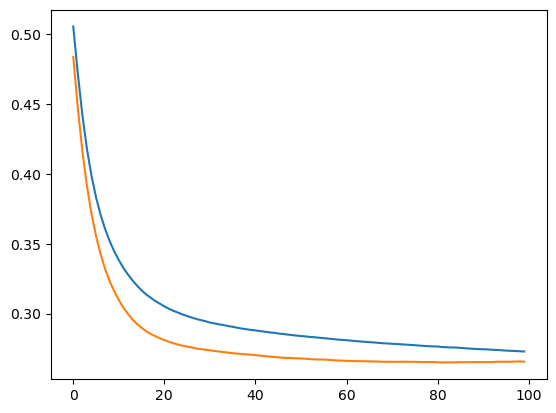

In [17]:
df_t = pd.DataFrame(history.history)
plt.plot(df_t)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lb = LabelEncoder()

In [20]:
lb.fit_transform(df['Sex'])

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [21]:
df["Sex"] = lb.fit_transform(df['Sex'])

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,Q
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
889,1,1,1,26.0,0,0,30.0000,C


In [23]:
X = df[["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]].values
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))

Можно построить заново другую ИНС

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestRegressor()

In [26]:
rf.fit(X_train, y_train)

C:\Users\VA\AppData\Local\Temp\ipykernel_11972\2725846524.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
rf.predict(X_test)

array([0.325, 0.75 , 0.255, 0.15 , 0.7  , 0.62 , 0.76 , 0.94 , 0.02 ,
       0.59 , 0.85 , 0.03 , 0.97 , 0.854, 1.   , 0.11 , 0.804, 0.19 ,
       0.   , 0.42 , 0.36 , 0.44 , 0.58 , 0.87 , 0.03 , 0.75 , 0.46 ,
       0.87 , 0.82 , 0.17 , 0.99 , 0.213, 0.203, 0.61 , 0.337, 0.32 ,
       0.01 , 0.76 , 0.71 , 0.99 , 0.14 , 0.01 , 0.25 , 0.9  , 0.31 ,
       0.19 , 0.83 , 1.   , 0.08 , 0.15 , 0.253, 0.381, 0.39 , 0.21 ,
       0.62 , 0.839, 0.16 , 0.03 , 0.   , 0.443, 0.508, 0.72 , 0.   ,
       0.275, 0.26 , 0.69 , 0.04 , 0.39 , 0.2  , 0.04 , 0.07 , 0.08 ,
       0.04 , 0.43 , 0.   , 0.745, 0.   , 0.661, 0.27 , 0.88 , 0.03 ,
       0.44 , 0.22 , 0.95 , 0.19 , 0.75 , 0.44 , 0.95 , 0.453, 0.81 ,
       0.33 , 0.164, 0.507, 0.84 , 0.252, 0.326, 0.   , 0.03 , 0.642,
       0.56 , 0.01 , 0.097, 0.87 , 0.03 , 0.37 , 0.15 , 0.61 , 0.32 ,
       0.076, 0.91 , 0.44 , 0.14 , 0.475, 0.73 , 0.839, 0.89 , 0.94 ,
       0.04 , 0.023, 0.06 , 0.14 , 0.324, 0.382, 0.514, 0.22 , 0.03 ,
       0.45 , 0.03 ,

In [28]:
np.mean((rf.predict(X_test) > 0.5).astype(int) == y_test.reshape(y_test.shape[0]))

0.7336448598130841

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
y = y.reshape(y.shape[0])
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

In [31]:
rf = RandomForestRegressor()

param_grid = {
   'n_estimators': [50, 100, 150],
   'max_depth' : [4, 5, 6],
   'criterion' :['squared_error']
}

GSCV = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] criterion=squared_error, max_depth=4, n_estimators=50 ...........
[CV]  criterion=squared_error, max_depth=4, n_estimators=50, total=   0.0s
[CV] criterion=squared_error, max_depth=4, n_estimators=50 ...........
[CV]  criterion=squared_error, max_depth=4, n_estimators=50, total=   0.0s
[CV] criterion=squared_error, max_depth=4, n_estimators=50 ...........
[CV]  criterion=squared_error, max_depth=4, n_estimators=50, total=   0.0s
[CV] criterion=squared_error, max_depth=4, n_estimators=50 ...........
[CV]  criterion=squared_error, max_depth=4, n_estimators=50, total=   0.0s
[CV] criterion=squared_error, max_depth=4, n_estimators=50 ...........
[CV]  criterion=squared_error, max_depth=4, n_estimators=50, total=   0.0s
[CV] criterion=squared_error, max_depth=4, n_estimators=100 ..........
[CV]  criterion=squared_error, max_depth=4, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=4, n_estimators=100 ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyEr

[CV]  criterion=squared_error, max_depth=4, n_estimators=150, total=   0.0s
[CV] criterion=squared_error, max_depth=4, n_estimators=150 ..........
[CV]  criterion=squared_error, max_depth=4, n_estimators=150, total=   0.0s
[CV] criterion=squared_error, max_depth=4, n_estimators=150 ..........
[CV]  criterion=squared_error, max_depth=4, n_estimators=150, total=   0.0s
[CV] criterion=squared_error, max_depth=4, n_estimators=150 ..........
[CV]  criterion=squared_error, max_depth=4, n_estimators=150, total=   0.0s
[CV] criterion=squared_error, max_depth=5, n_estimators=50 ...........
[CV]  criterion=squared_error, max_depth=5, n_estimators=50, total=   0.0s
[CV] criterion=squared_error, max_depth=5, n_estimators=50 ...........
[CV]  criterion=squared_error, max_depth=5, n_estimators=50, total=   0.0s
[CV] criterion=squared_error, max_depth=5, n_estimators=50 ...........
[CV]  criterion=squared_error, max_depth=5, n_estimators=50, total=   0.0s
[CV] criterion=squared_error, max_depth=5, n_

C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=5, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, n_estimators=100 ..........
[CV]  criterion=squared_error, max_depth=5, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=5, n_estimators=150 ..........
[CV]  criterion=squared_error, max_depth=5, n_estimators=150, total=   0.0s
[CV] criterion=squared_error, max_depth=5, n_estimators=150 ..........
[CV]  criterion=squared_error, max_depth=5, n_estimators=150, total=   0.0s
[CV] criterion=squared_error, max_depth=5, n_estimators=150 ..........
[CV]  criterion=squared_error, max_depth=5, n_estimators=150, total=   0.0s
[CV] criterion=squared_error, max_depth=5, n_estimators=150 ..........
[CV]  criterion=squared_error, max_depth=5, n_estimators=150, total=   0.0s
[CV] criterion=squared_error, max_depth=5, n_estimators=150 ..........
[CV]  criterion=squared_error, max_depth=5, n_estimators=150, total=   0.0s
[CV] criterion=squared_error, max_depth=6,

C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_valid

[CV]  criterion=squared_error, max_depth=6, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, n_estimators=100 ..........
[CV]  criterion=squared_error, max_depth=6, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, n_estimators=100 ..........
[CV]  criterion=squared_error, max_depth=6, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, n_estimators=100 ..........
[CV]  criterion=squared_error, max_depth=6, n_estimators=100, total=   0.0s
[CV] criterion=squared_error, max_depth=6, n_estimators=150 ..........
[CV]  criterion=squared_error, max_depth=6, n_estimators=150, total=   0.0s
[CV] criterion=squared_error, max_depth=6, n_estimators=150 ..........
[CV]  criterion=squared_error, max_depth=6, n_estimators=150, total=   0.0s
[CV] criterion=squared_error, max_depth=6, n_estimators=150 ..........
[CV]  criterion=squared_error, max_depth=6, n_estimators=150, total=   0.0s
[CV] criterion=squared_error, max_depth=6,

C:\Users\VA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.0s finished


KeyError: 'squared_error'

In [32]:
rf = GSCV.best_estimator_
rf.fit(X_train, y_train)
rf.predict(X_test)

KeyError: 'squared_error'

In [33]:
np.mean((rf.predict(X_test) > 0.5).astype(int) == y_test.reshape(y_test.shape[0]))

IndexError: list index out of range

In [ ]:
rf = RandomForestClassifier()

param_grid = {
   'n_estimators': [50, 100, 150, 300, 500],
   'max_depth' : [4, 5, 6]
}

GSCV = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

In [ ]:
rf = GSCV.best_estimator_

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
np.mean(rf.predict(X_test) == y_test.reshape(y_test.shape[0]))